# Fittings for volatile solubilities

In [279]:
import pandas as pd
import numpy as np

from atmodeller import GAS_CONSTANT, logger
wtp_to_ppmw = 10000

In [280]:
#Import plotting tools:

import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=15)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 15}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

# H2 Solubility

### Hirschmann et al. 2012


#### Fitting to Table 2, fH2 vs. H2 Concentration (wt. \%) 

In [286]:
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a* (x**b)

def fit_powerlaw_fH2vsH(composition:str, Col1:str, Col2: str, Col3: str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=(Col1, Col2, Col3))
    # Power Law fitting
    fH2: np.ndarray = df[Col2].to_numpy()
    H2wt: np.ndarray = df[Col1].to_numpy()
    H2ppmw: np.ndarray = H2wt*wtp_to_ppmw #from wt % to ppmw
    solution, cov = curve_fit(power_law, fH2, H2ppmw)

    return solution, cov

def fit_leastsquares_fH2vsH(composition:str, Col1:str, Col2: str, Col3: str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=(Col1, Col2, Col3))
    # Least squares fitting.
    fH2: np.ndarray = df[Col2].to_numpy()
    H2wt: np.ndarray = df[Col1].to_numpy()
    H2ppmw: np.ndarray = H2wt*wtp_to_ppmw #from wt % to ppmw
    design_matrix: np.ndarray = fH2[:, np.newaxis]**[1, 0]
    solution, resids, _, _ = np.linalg.lstsq(design_matrix, H2ppmw, rcond=None)

    return solution, resids

In [290]:

#Power Law Fitting:
basalt_sol, basalt_cov = fit_powerlaw_fH2vsH('Basalt_fH2vsH2Conc', 'H2_wtp', 'fH2_bar', 'fO2')
andesite_sol, andesite_cov = fit_powerlaw_fH2vsH('Andesite_fH2vsH2Conc', 'H2_wtp', 'fH2_bar', 'fO2')
print('Power Law Fit Parameters:')
print('Basalt:', basalt_sol)
print('Andesite:', andesite_sol)
print('')
print('Power Law Fitting Errors (1 std)')
print(np.sqrt(np.diag(basalt_cov)))
print(np.sqrt(np.diag(andesite_cov)))

Power Law Fit Parameters:
Basalt: [53.65376493  0.38365457]
Andesite: [34.4336867   0.49459428]

Power Law Fitting Errors (1 std)
[82.09989063  0.15069136]
[49.6585646   0.13130443]


In [291]:
#Least-Square Linear Fitting
basalt_linsol, basalt_linresid = fit_leastsquares_fH2vsH('Basalt_fH2vsH2Conc', 'H2_wtp', 'fH2_bar', 'fO2')
andesite_linsol, andesite_linresid = fit_leastsquares_fH2vsH('Andesite_fH2vsH2Conc', 'H2_wtp', 'fH2_bar', 'fO2')
print('Linear Fit Parameters:')
print(basalt_linsol)
print(andesite_linsol)
print('')
print('Linear Fit Residuals')
print(basalt_linresid)
print(andesite_linresid)

Linear Fit Parameters:
[3.77428960e-02 1.43790408e+03]
[8.17122384e-02 2.76894342e+03]

Linear Fit Residuals
[9761254.41018997]
[39788613.98476064]


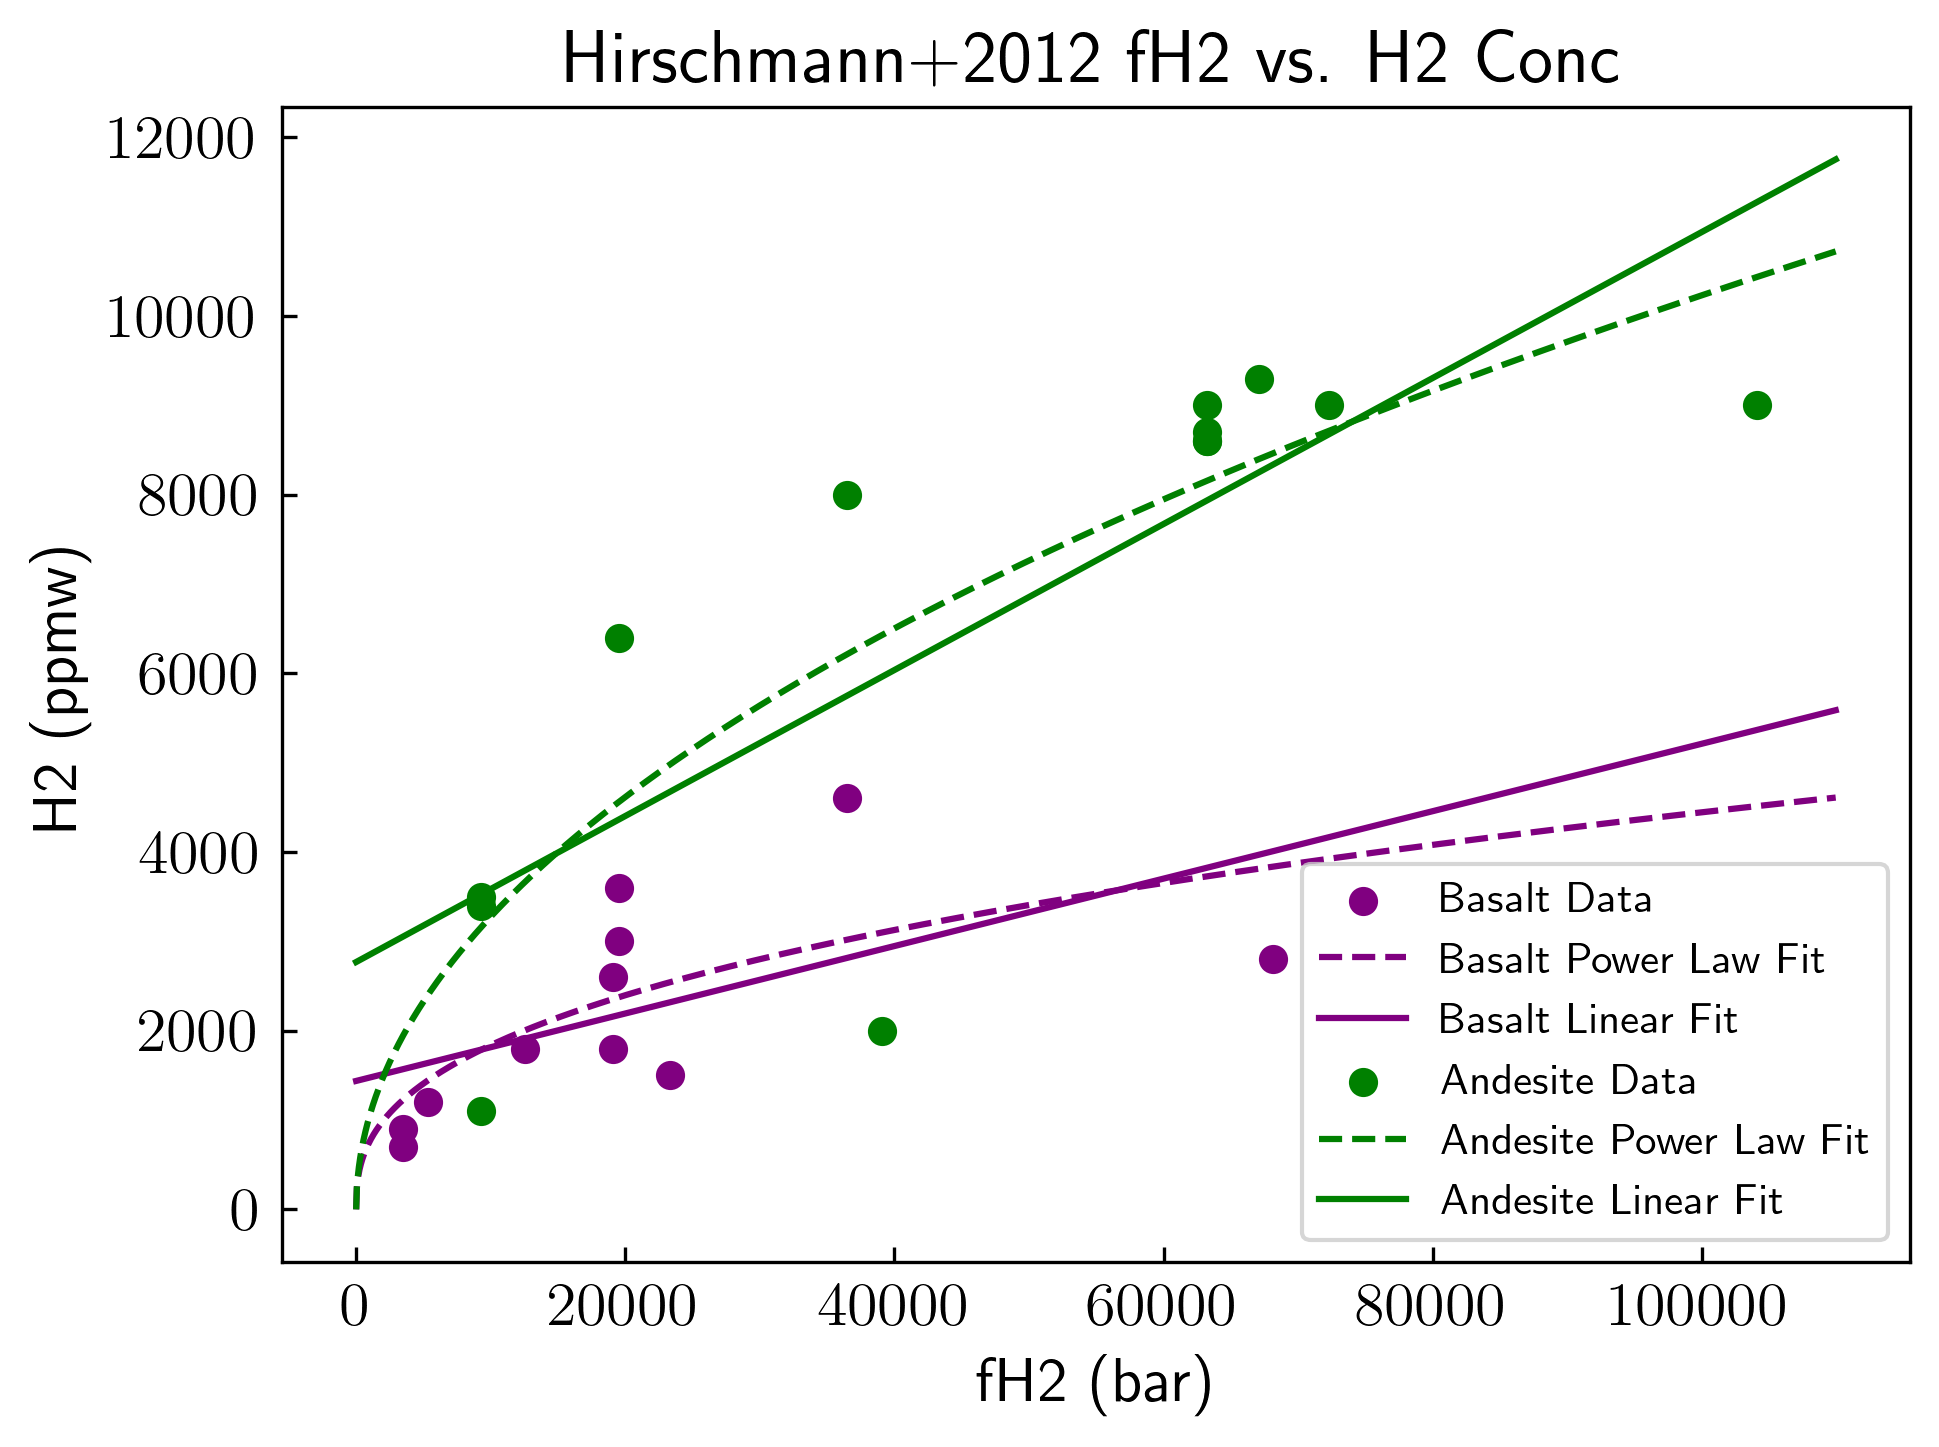

In [292]:
datafile_basalt: str = f"data/solubility_data/H2/H2Sol_Basalt_fH2vsH2Conc.csv"
df_basalt: pd.DataFrame = pd.read_csv(datafile_basalt, names=('H2_wtp', 'fH2_bar', 'fO2'))

datafile_andesite: str = f"data/solubility_data/H2/H2Sol_Andesite_fH2vsH2Conc.csv"
df_andesite: pd.DataFrame = pd.read_csv(datafile_andesite, names=('H2_wtp', 'fH2_bar', 'fO2'))

fH2_bar_arr = np.arange(0,110000,50)


fig, ax = plt.subplots()

plt.scatter(df_basalt['fH2_bar'], df_basalt['H2_wtp']*10000, color='purple', label='Basalt Data')
plt.plot(fH2_bar_arr, basalt_sol[0]*(fH2_bar_arr**basalt_sol[1]), linestyle='--', color='purple', label='Basalt Power Law Fit')
plt.plot(fH2_bar_arr, (basalt_linsol[0]*fH2_bar_arr)+basalt_linsol[1], linestyle='-', color='purple', label='Basalt Linear Fit')

plt.scatter(df_andesite['fH2_bar'], df_andesite['H2_wtp']*10000, color='green', label='Andesite Data')
plt.plot(fH2_bar_arr, andesite_sol[0]*(fH2_bar_arr**andesite_sol[1]), linestyle='--', color='green', label='Andesite Power Law Fit')
plt.plot(fH2_bar_arr, (andesite_linsol[0]*fH2_bar_arr)+andesite_linsol[1], linestyle='-', color='green', label='Andesite Linear Fit')

#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('fH2 (bar)')
plt.ylabel('H2 (ppmw)')
plt.legend(fontsize='x-small')
plt.title('Hirschmann+2012 fH2 vs. H2 Conc')
plt.show()



#### Fitting to Figure 5 of Hirschmann+2012 (H2 (ppm) vs. P for Basalt and Peridotite)

##### Fitting Functions

In [189]:
def least_squares_fitH2(composition:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    design_matrix: np.ndarray = pressure[:, np.newaxis]**[1, 0]
    #print('design matrix:', design_matrix)
    solution, _, _, _ = np.linalg.lstsq(design_matrix, H2_arr, rcond=None)

    return solution

def poly_fitH2(composition:str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    coeffs = np.polyfit(pressure, H2_arr, deg=2)
    #poly = np.poly1d(coeffs)

    #pfit = lambda pressure: 10**(poly(np.log10(pressure)))
    return coeffs 

def poly_fitH2_logscale(composition:str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    logp = np.log10(pressure)
    logH2 = np.log10(H2_arr)
    coeffs = np.polyfit(logp, logH2, deg=2)
    #poly = np.poly1d(coeffs)

    #pfit = lambda pressure: 10**(poly(np.log10(pressure)))
    return coeffs 


def fit_powerlaw_H12(composition:str, Col1:str, Col2: str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=(Col1, Col2))
    # Least squares fitting.
    pressure: np.ndarray = df[Col1].to_numpy()
    H2ppm_arr: np.ndarray = df[Col2].to_numpy()
    solution, _ = curve_fit(power_law, pressure, H2ppm_arr)

    return solution


##### Run the fit and test:

In [205]:
#Least squares fitting to a line:
a_b_lin, b_b_lin = least_squares_fitH2("BasaltPureH2_Fig5")
print('Basalt, Pure H2, Linear Fit:', a_b_lin, b_b_lin)
a_p_l, b_p_l = least_squares_fitH2("PeridotitePureH2_Fig5")
print('Peridotite, Linear Fit:', a_p_l, b_p_l)
a_bIW, b_bIW = least_squares_fitH2("BasaltIW_Fig5")

a_bIWp2, b_bIWp2 = least_squares_fitH2("BasaltIWp2_Fig5")

a_bIWm2, b_bIWm2 = least_squares_fitH2("BasaltIWm2_Fig5")

Basalt, Pure H2, Linear Fit: 6367.262331861269 -139.32847734809346
Peridotite, Linear Fit: 1725.0205483263528 -10.522148110249578


In [198]:
#Polynomial fitting:

a_b, b_b, c_b = poly_fitH2("BasaltPureH2_Fig5")
print('Basalt, Poly Fit:', a_b, b_b, c_b)

a_p, b_p, c_p = poly_fitH2("PeridotitePureH2_Fig5")
print('Peridotite, Poly Fit:', a_p, b_p, c_p)

a_b2, b_b2, c_b2 = poly_fitH2_logscale("BasaltPureH2_Fig5")
print('Basalt Poly Fit on log scale:', a_b2, b_b2, c_b2)


Basalt, Poly Fit: 2098.549267158505 4453.086503397883 -1.0594548598994866
Peridotite, Poly Fit: 31.10688753142463 1696.7339726782197 -8.00216936485055
Basalt Poly Fit on log scale: 0.056486519518222804 1.196049072065023 3.8047213640913826


In [212]:
#Power law fitting:

a_b_pl, b_b_pl = fit_powerlaw_H12('BasaltPureH2_Fig5', 'Pressure_GPa', 'H2_ppm')
print('Basalt, Power Law Fit:', a_b_pl, b_b_pl)

a_p_pl, b_p_pl = fit_powerlaw_H12('PeridotitePureH2_Fig5', 'Pressure_GPa', 'H2_ppm')
print('Peridotite, Power Law Fit:', a_p_pl, b_p_pl)


Basalt, Power Law Fit: 6479.746615665021 1.2043760101874461
Peridotite, Power Law Fit: 1722.3140666204845 1.0261144243791542


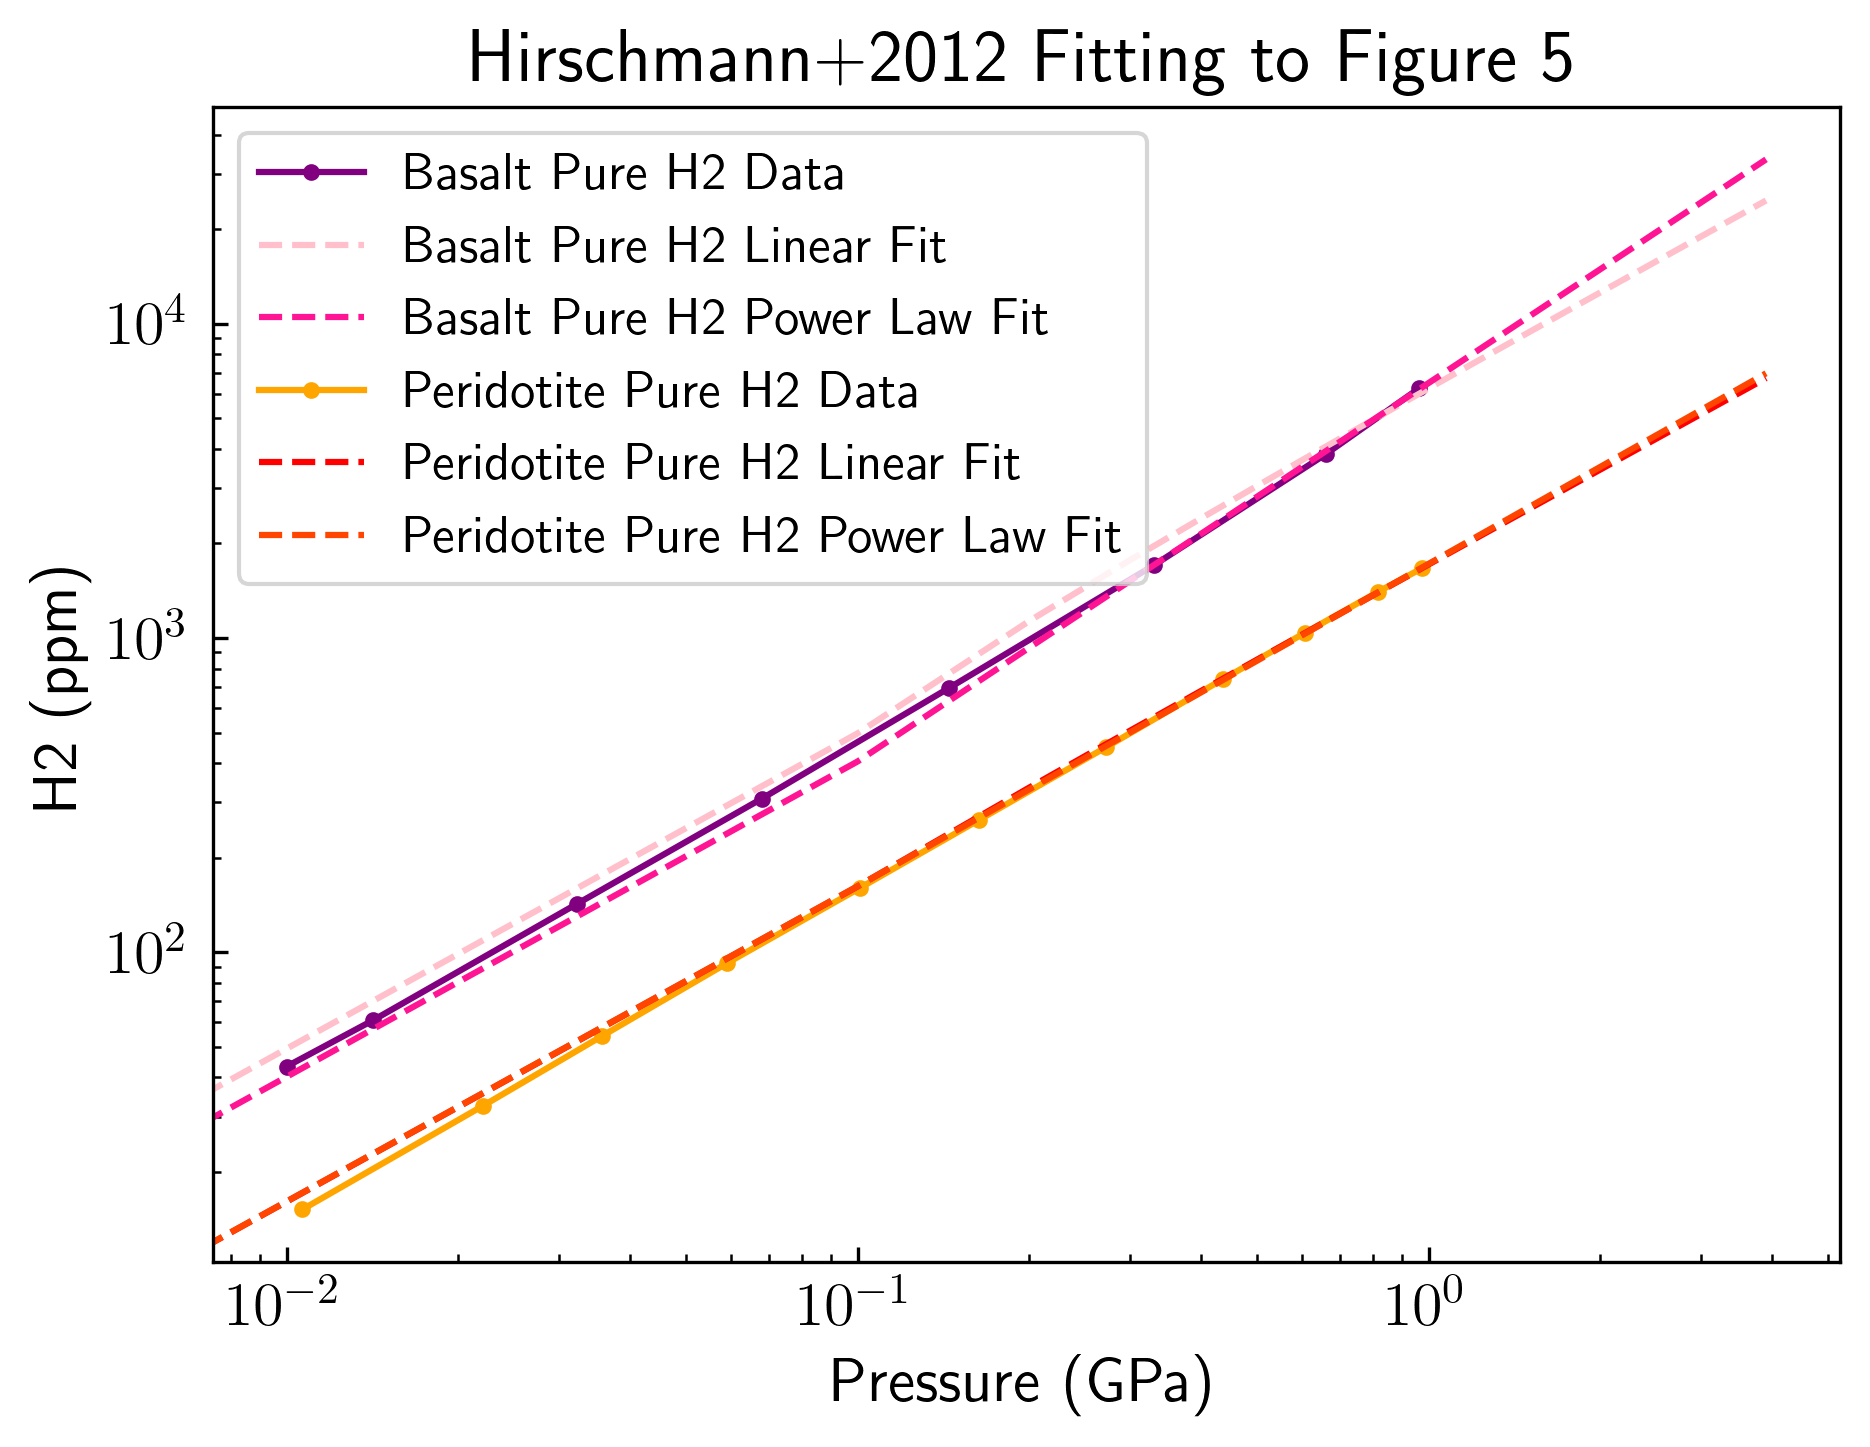

In [211]:
#Let's plot the data to see how the fit looks:
datafile_basaltH2: str = f"data/solubility_data/H2/H2Sol_BasaltPureH2_Fig5.csv"
df_basaltH2: pd.DataFrame = pd.read_csv(datafile_basaltH2, names=('P_GPa', 'H2_ppm'))

datafile_peridotiteH2: str = f"data/solubility_data/H2/H2Sol_PeridotitePureH2_Fig5.csv"
df_peridotiteH2: pd.DataFrame = pd.read_csv(datafile_peridotiteH2, names=('P_GPa', 'H2_ppm'))

datafile_basaltIW: str = f"data/solubility_data/H2/H2Sol_BasaltIW_Fig5.csv"
df_basaltIW:pd.DataFrame = pd.read_csv(datafile_basaltIW, names=('P_GPa', 'H2_ppm'))

datafile_basaltIWp2: str = f"data/solubility_data/H2/H2Sol_BasaltIWp2_Fig5.csv"
df_basaltIWp2:pd.DataFrame = pd.read_csv(datafile_basaltIWp2, names=('P_GPa', 'H2_ppm'))

datafile_basaltIWm2: str = f"data/solubility_data/H2/H2Sol_BasaltIWm2_Fig5.csv"
df_basaltIWm2:pd.DataFrame = pd.read_csv(datafile_basaltIWm2, names=('P_GPa', 'H2_ppm'))

pressure_arr_GPa = np.arange(0,4, 0.1)

fig, ax = plt.subplots()
#plt.plot(df_basaltIW['P_GPa'], df_basaltIW['H2_ppm'], marker='.', color='navy', label='IW Data')
#plt.plot(df_basaltIW['P_GPa'], (df_basaltIW['P_GPa']*a_bIW)+b_bIW, linestyle='--', color='dodgerblue', label='IW Fit')

#plt.plot(df_basaltIWp2['P_GPa'], df_basaltIWp2['H2_ppm'], marker='.', color='forestgreen', label='IW+2 Data')
#plt.plot(df_basaltIWp2['P_GPa'], (df_basaltIWp2['P_GPa']*a_bIWp2)+b_bIWp2, linestyle='--', color='green', label='IW+2 Fit')

#plt.plot(df_basaltIWm2['P_GPa'], df_basaltIWm2['H2_ppm'], marker='.', color='orange', label='IW-2 Data')
#plt.plot(df_basaltIWm2['P_GPa'], (df_basaltIWm2['P_GPa']*a_bIWm2)+b_bIWm2, linestyle='--', color='red', label='IW-2 Fit')

plt.plot(df_basaltH2['P_GPa'], df_basaltH2['H2_ppm'], marker='.', color='purple', label='Basalt Pure H2 Data')
#plt.plot(pressure_arr_GPa, (a_b*(pressure_arr_GPa)**2)+(b_b*pressure_arr_GPa)+c_b, linestyle='--', color='violet', label='Basalt Pure H2 Poly Fit')
plt.plot(pressure_arr_GPa, a_b_lin*(pressure_arr_GPa)+b_b_lin, linestyle='--', color='pink', label='Basalt Pure H2 Linear Fit')
plt.plot(pressure_arr_GPa, a_b_pl*(pressure_arr_GPa**b_b_pl), linestyle='--', color='deeppink', label='Basalt Pure H2 Power Law Fit')

plt.plot(df_peridotiteH2['P_GPa'], df_peridotiteH2['H2_ppm'], marker='.', color='orange', label='Peridotite Pure H2 Data')
#plt.plot(df_peridotiteH2['P_GPa'], (a_p*(df_peridotiteH2['P_GPa'])**2)+(b_p*df_peridotiteH2['P_GPa'])+c_p, linestyle='--', color='red', label='Peridotite Pure H2 Poly Fit')
plt.plot(pressure_arr_GPa, a_p_l*(pressure_arr_GPa)+b_p_l, linestyle='--', color='red', label='Peridotite Pure H2 Linear Fit')
plt.plot(pressure_arr_GPa, a_p_pl*(pressure_arr_GPa**b_p_pl), linestyle='--', color='orangered', label='Peridotite Pure H2 Power Law Fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pressure (GPa)')
plt.ylabel('H2 (ppm)')
plt.legend(fontsize='small')
plt.title('Hirschmann+2012 Fitting to Figure 5')
plt.show()


In [80]:
def least_squares_fitH2_PfO2(composition_fO2:list, fO2_offset:list):
    """Fit the H2 solubility data as a function of P and fO2
    
    Args:
        composition at a particular fO2

    Returns:
        The least-squares fit coefficients.
    """
    pressure_arr: np.ndarray = []
    H2_arr: np.ndarray=[]
    fO2offset_arr = np.ndarray = []

    for i,j in zip(composition_fO2, fO2_offset):
        datafile: str = f"data/solubility_data/H2/H2Sol_{i}_Fig5.csv"
        print(datafile)
        df: pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
        df['fO2relIW'] = j
        pressure: np.ndarray = df['P_GPa'].to_numpy()
        H2_val: np.ndarray = df['H2_ppm'].to_numpy()
        fO2offset_val: np.ndarray = df['fO2relIW'].to_numpy()
        pressure_arr.append(pressure)
        H2_arr.append(H2_val)
        fO2offset_arr.append(fO2offset_val)
    
    print('H2 Array:', H2_arr)
    design_matrix: np.ndarray = [pressure_arr, fO2offset_arr]
    print('design matrix:', design_matrix)
    #solution, _, _, _ = np.linalg.lstsq(design_matrix, H2_arr, rcond=None)

    return 0.0

15    120.984221
16    132.651591
17    144.318962
18    155.986332
19    167.653703
20    179.321074
21    190.988444
22    202.655815
23    214.323185
24    225.990556
25    237.657926
26    249.325297
27    260.992668
28    272.660038
29    284.327409
30    295.994779
Name: T(K), dtype: float64


In [ ]:
#Because Figure 5 is plotting H2 ppm vs. TOTAL pressure, not sure if we can determine H2 vs. fH2/PH2 from this...

#class PeridotiteH2(Solubility):
    """Hirschmann et al. 2012 for Peridotite.

    Fitting power law to Figure 5, Peridotite Pure H2 curve.
    """

 #   def _solubility(self, pressure: float, temperature: float, fo2: float) -> float:
 #       del temperature
 #       del fo2
 #       # TODO: Maggie to check, variable is not currently used.
 #       pressure_gpa: float = pressure * bar_to_GPa  # pylint: disable=unused-variable
 #       # TODO: Maggie to check, ppm or ppmw? Probably use ppmw to be explicit if by weight.
 #       ppm: float = self.power_law(pressure, 1722.31, 1.03)
 #       return ppm

#### Fitting to Figure 4 of Hirschmann+2012 (ln(XH2/fH2) vs. P), they include a linear fit, but we need to include a function or fit for fH2

In [219]:
def least_squares_fH2(filename:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    datafile: str = f"data/solubility_data/H2/{filename}"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'fH2_bar'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    fH2_arr: np.ndarray = df['fH2_bar'].to_numpy()
    design_matrix: np.ndarray = pressure[:, np.newaxis]**[1, 0]
    #print('design matrix:', design_matrix)
    solution, _, _, _ = np.linalg.lstsq(design_matrix, fH2_arr, rcond=None)

    return solution

def polyfit_fH2(filename:str):
    datafile: str = f"data/solubility_data/H2/{filename}"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'fH2_bar'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    fH2_arr: np.ndarray = df['fH2_bar'].to_numpy()
    coeffs = np.polyfit(pressure, fH2_arr, deg=2)
    return coeffs 

def fit_powerlaw_fH2(composition:str, Col1:str, Col2: str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=(Col1, Col2))
    # Least squares fitting.
    pressure: np.ndarray = df[Col1].to_numpy()
    fH2_arr: np.ndarray = df[Col2].to_numpy()
    solution, _ = curve_fit(power_law, pressure, fH2_arr)
    return solution
    

In [225]:
#Basalt:
a_fH2, b_fH2 = least_squares_fH2('H2Sol_fH2vsP.csv') #linear fit
a_fH2_p, b_fH2_p, c_fH2_p = polyfit_fH2('H2Sol_fH2vsP.csv') #deg-2 polynomial fit
a_fH2_pl, b_fH2_pl = fit_powerlaw_fH2('fH2vsP', 'Pressure_GPa', 'fH2_bar') #power law fit

#Andesite:
a_fH2_and, b_fH2_and = least_squares_fH2('H2Sol_fH2vsP_Andesite.csv') #linear fit
a_fH2_pand, b_fH2_pand, c_fH2_pand = polyfit_fH2('H2Sol_fH2vsP_Andesite.csv')# deg-2 polynomial fit
a_fH2_pland, b_fH2_pland = fit_powerlaw_fH2('fH2vsP_Andesite', 'Pressure_GPa', 'fH2_bar') #power law fit

print('Basalt, power law fit to fH2 vs. P:', a_fH2_pl, b_fH2_pl)
print('Andesite, power law fit to fH2 vs. P:', a_fH2_pland, b_fH2_pland)




Basalt, power law fit to fH2 vs. P: 7458.80786502385 2.011987842299546
Andesite, power law fit to fH2 vs. P: 7856.312650689447 2.1689677476224323


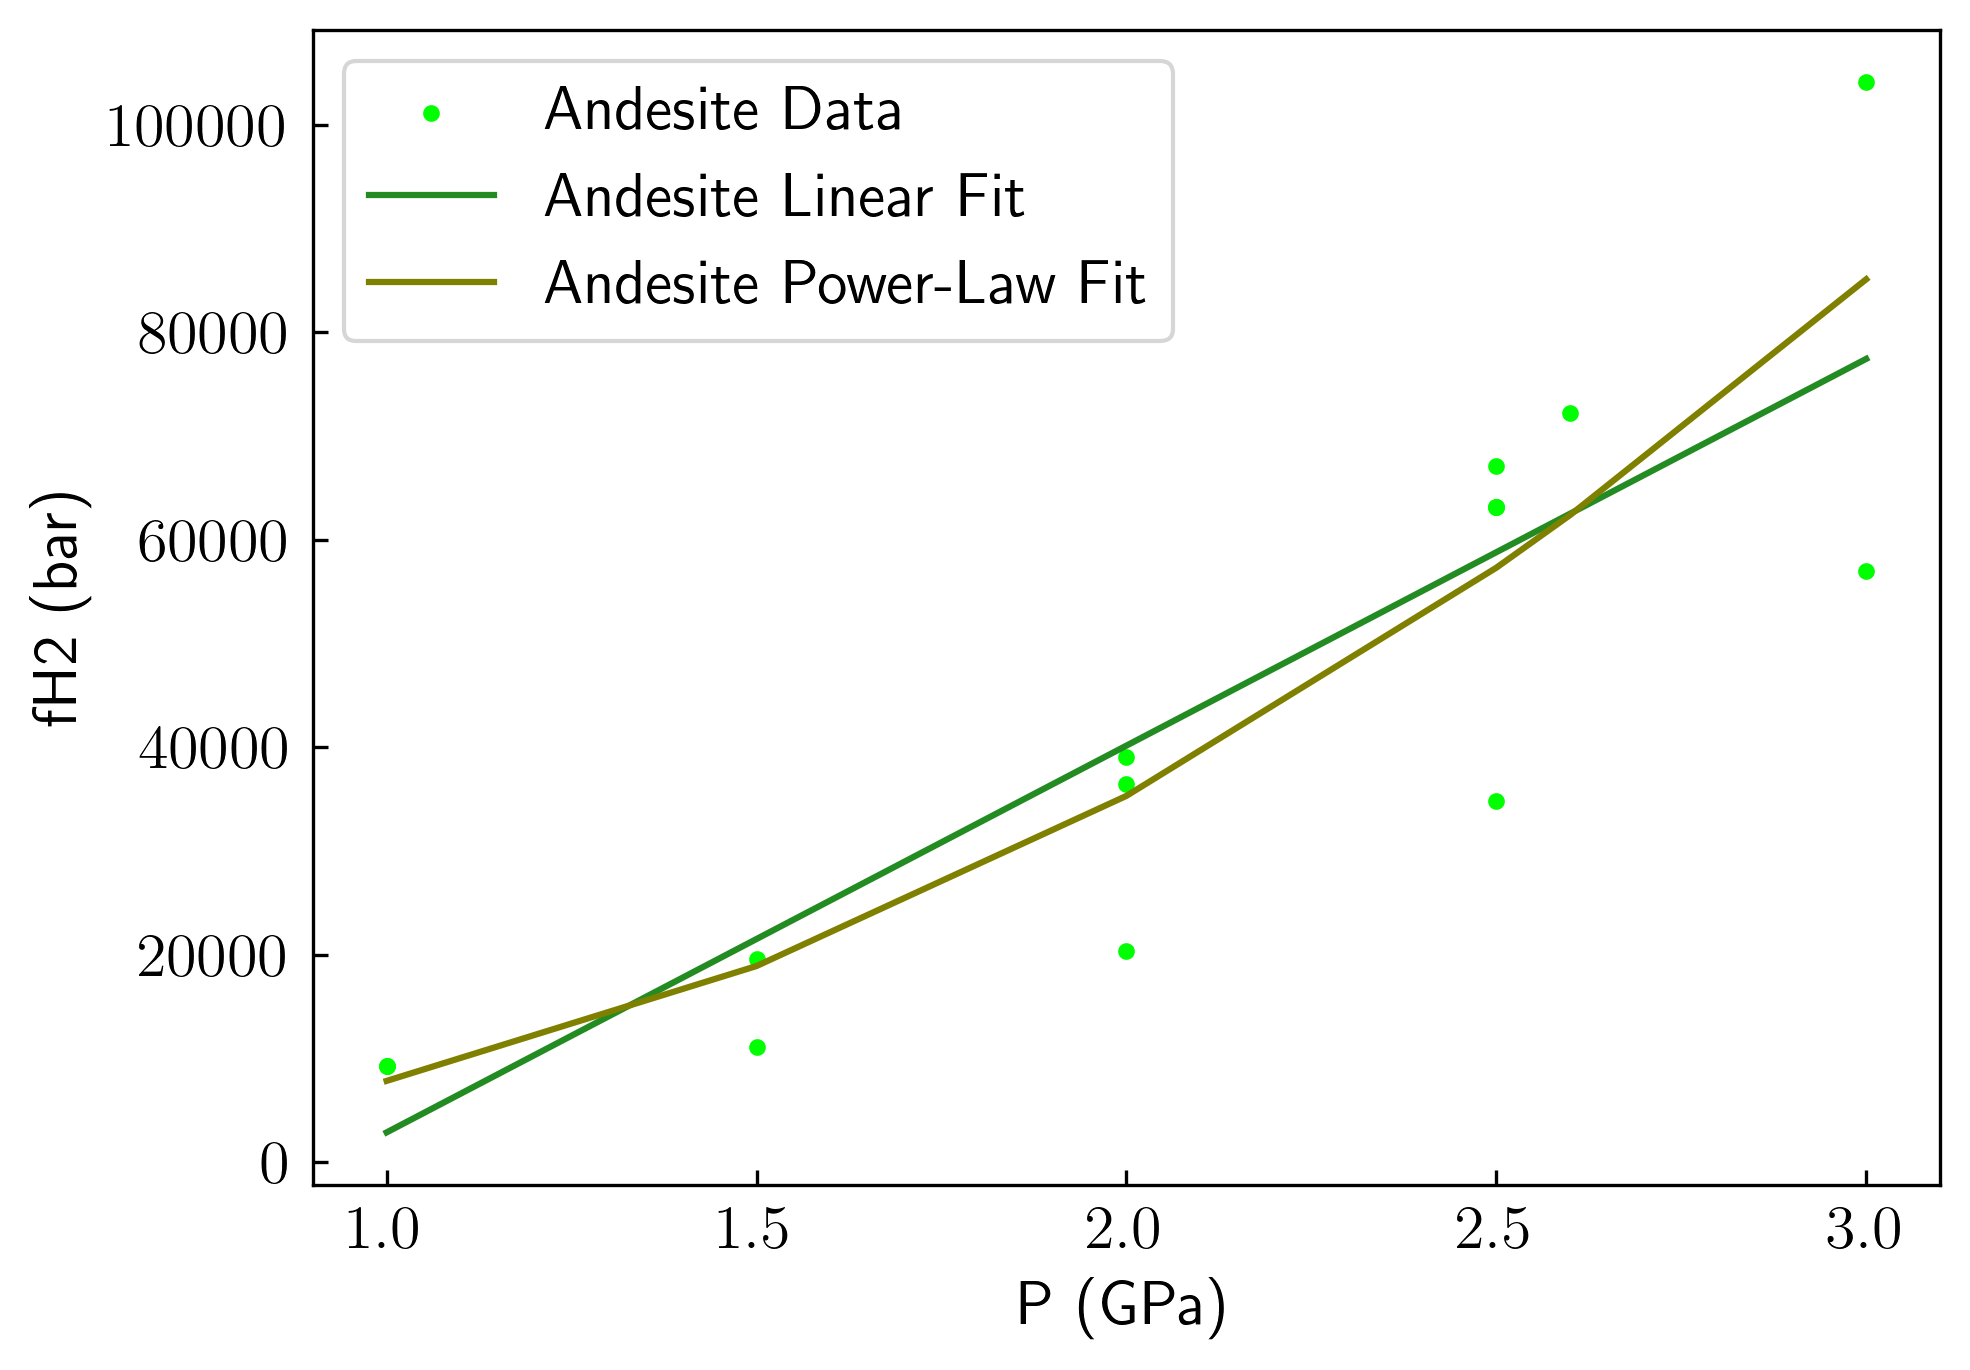

In [224]:
datafile_fH2: str = f"data/solubility_data/H2/H2Sol_fH2vsP.csv"
df_fH2: pd.DataFrame = pd.read_csv(datafile_fH2, names=('P_GPa', 'fH2_bar'))

datafile_fH2_and: str = f"data/solubility_data/H2/H2Sol_fH2vsP_Andesite.csv"
df_fH2_and: pd.DataFrame = pd.read_csv(datafile_fH2_and, names=('P_GPa', 'fH2_bar'))

fig,ax = plt.subplots()
plt.scatter(df_fH2.P_GPa, df_fH2.fH2_bar, marker='.', color='navy', label='Basalt Data')
plt.plot(df_fH2.P_GPa, (df_fH2.P_GPa*a_fH2)+b_fH2, color='dodgerblue', label='Basalt Linear Fit')
#plt.plot(df_fH2.P_GPa, (a_fH2_p*(df_fH2.P_GPa)**2)+(b_fH2_p*df_fH2.P_GPa)+c_fH2_p, color='purple', label='Basalt Poly Fit')
plt.plot(df_fH2.P_GPa, a_fH2_pl*(df_fH2.P_GPa)**b_fH2_pl, color='purple', label='Basalt Power Law Fit')

plt.scatter(df_fH2_and.P_GPa, df_fH2_and.fH2_bar, marker='.', color='lime', label='Andesite Data')
plt.plot(df_fH2_and.P_GPa, (df_fH2_and.P_GPa*a_fH2_and)+b_fH2_and, color='forestgreen', label='Andesite Linear Fit')
#plt.plot(df_fH2_and.P_GPa, (a_fH2_pand*(df_fH2_and.P_GPa)**2)+(b_fH2_pand*df_fH2_and.P_GPa)+c_fH2_pand, color='olive', label='Andesite Poly Fit')
plt.plot(df_fH2_and.P_GPa, a_fH2_pland*(df_fH2_and.P_GPa)**b_fH2_pland, color='olive', label='Andesite Power-Law Fit')

plt.legend()
plt.ylabel('fH2 (bar)')
plt.xlabel('P (GPa)')
plt.show()



In [226]:
#Basalt Fit Parameters:
print(a_fH2_p, b_fH2_p, c_fH2_p)

print(a_fH2, b_fH2)

print(a_fH2_pl, b_fH2_pl)

7977.1994887131905 -1667.9626392938358 1363.7546764214728
25766.171693735494 -18763.475638051073
7458.80786502385 2.011987842299546


In [227]:
#Andesite Fit Parameters:
print(a_fH2_pand, b_fH2_pand, c_fH2_pand)

print(a_fH2_and, b_fH2_and)

print(a_fH2_pland, b_fH2_pland)

11356.1024251489 -6604.146770869993 2897.5700448704315
37281.77790469974 -34388.54667101824
7856.312650689447 2.1689677476224323


In [231]:
#Fitting function for Figure 4, using their linear fit and performing our own fit on the fH2 vs. P data from Tables 1 and 2
def H2_HirschmannFig4(pressure: float) -> float:
    bar_to_GPa: float = 0.0001 #GPa/bar
    bar_to_MPa: float = 0.1 #bar/MPa
    molefrac_to_ppm: float = 1e6 #ppm/molefrac
    pressure_GPa: float = pressure*bar_to_GPa
    #fH2 = (7977.1995*(pressure_GPa**2)) - 1667.9626*pressure_GPa + 1363.7547 #bars; deg-2 polynomial fit
    #fH2 = (25766.1717*pressure_GPa) - 18763.4756 #linear fit
    fH2 = 7458.81*(pressure_GPa**2.01) #power-law fit
    fH2_MPa = fH2*bar_to_MPa #convert fH2 from bar to MPa
    #print('fH2:', fH2)
    molefrac: float = np.exp(-11.403-(0.76*pressure_GPa))*fH2_MPa
    ppm: float = molefrac* molefrac_to_ppm #CHECK, is there an extra step to make this ppmw?
    return ppm

fH2_try = H2_HirschmannFig4(7000)
print(fH2_try)

def H2_HirschmannFig4_Andesite(pressure: float) -> float:
    bar_to_GPa: float = 0.0001 #GPa/bar
    bar_to_MPa: float = 0.1 #bar/MPa
    molefrac_to_ppm: float = 1e6 #ppm/molefrac
    pressure_GPa: float = pressure*bar_to_GPa
    #fH2 = (11356.1024*(pressure_GPa**2)) - 6604.1468*pressure_GPa + 2897.5700 #bars; doing 2-degree polynomial fit
    #fH2 = (37281.7779*pressure_GPa) - 34388.5467 #linear fit 
    fH2 = 7856.31*(pressure_GPa**2.17)
    fH2_MPa = fH2*bar_to_MPa #convert fH2 from bar to MPa
    #print('fH2:', fH2)
    molefrac: float = np.exp(-10.591-(0.81*pressure_GPa))*fH2_MPa
    ppm: float = molefrac* molefrac_to_ppm #CHECK, is there an extra step to make this ppmw?
    return ppm

fH2_andesite_try = H2_HirschmannFig4_Andesite(15000)

2387.8770598220644


In [164]:
#IGNORE FOR NOW, I DON'T THINK THIS IS RIGHT
#H2 concentration determined from Figure 4, using their fit and calculating fH2 from EOS of Zhang & Duan 2009, Equation 9 
def H2_HirschmannFig4_EOSBasalt(pressure: float) -> float:
    bar_to_GPa: float = 0.0001 #bar/GPa
    bar_to_MPa: float = 0.1 #bar/MPa
    molefrac_to_ppm: float = 1e6 #ppm/molefrac
    pressure_GPa: float = pressure*bar_to_GPa
    pressure_MPa: float = pressure*bar_to_MPa
    kb: float = 1.3806e-23  #Boltzmann constant, J/K
    molefrac: float = np.exp(-11.403-(0.76*pressure_GPa))*np.log((3.0636*(2.93e-10)**3 * pressure_MPa)/(31.2*kb))
    ppm: float = molefrac* molefrac_to_ppm #CHECK, is there an extra step to make this ppmw?
    return ppm

In [166]:
H2_EOStry = H2_HirschmannFig4_EOSBasalt(10000)
print(H2_EOStry)

-45.04229533715974


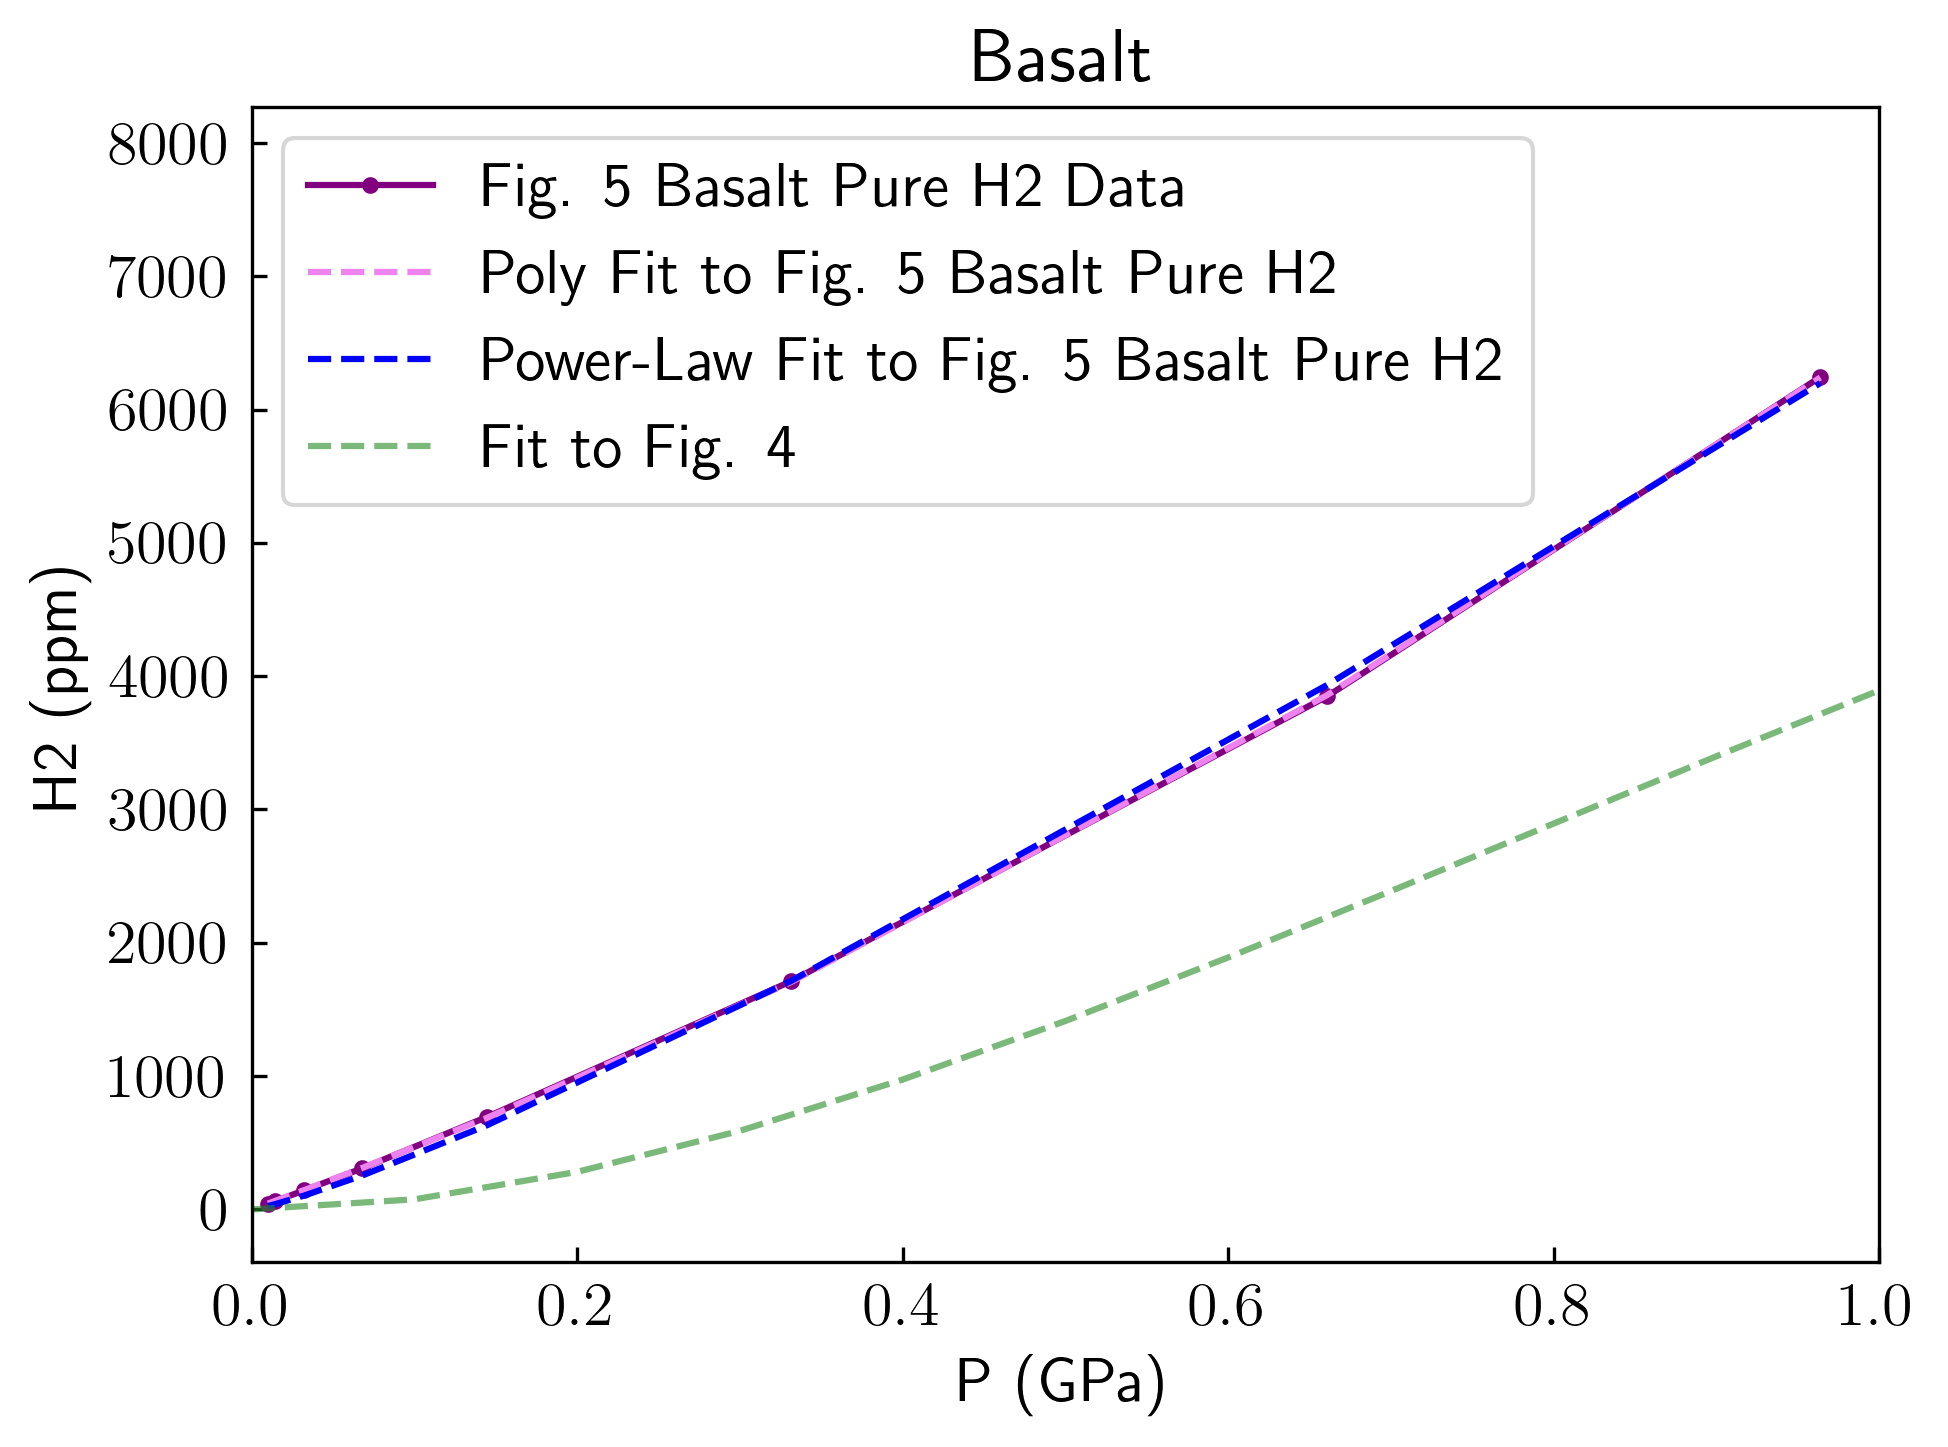

In [234]:
#Checking to make sure H2 concentrations are consistent between Fig. 4 and Fig. 5 Fits:
pressure_arr = np.arange(0,4.1, 0.1)
GPa_to_bar: float = 1e4 #bar/GPa

fig, ax = plt.subplots()
plt.plot(df_basaltH2['P_GPa'], df_basaltH2['H2_ppm'], marker='.', color='purple', label='Fig. 5 Basalt Pure H2 Data')
plt.plot(df_basaltH2['P_GPa'], (a_b*(df_basaltH2['P_GPa'])**2)+(b_b*df_basaltH2['P_GPa'])+c_b, linestyle='--', color='violet', label='Poly Fit to Fig. 5 Basalt Pure H2')
plt.plot(df_basaltH2['P_GPa'], (a_b_pl*(df_basaltH2['P_GPa'])**b_b_pl), linestyle='--', color='blue', label='Power-Law Fit to Fig. 5 Basalt Pure H2')
plt.plot(pressure_arr, (H2_HirschmannFig4(pressure_arr*GPa_to_bar)), color='forestgreen', linestyle='--', alpha=0.6, label='Fit to Fig. 4')
plt.legend()
plt.ylabel('H2 (ppm)')
plt.xlabel('P (GPa)')
plt.xlim(0, 1)
plt.title('Basalt')
plt.show()



fH2: [  1363.7547     1276.730435   1349.25016    1581.313875   1972.92158
   2524.073275   3234.76896    4105.008635   5134.7923     6324.119955
   7672.9916     9181.407235  10849.36686   12676.870475  14663.91808
  16810.509675  19116.64526   21582.324835  24207.5484    26992.315955
  29936.6275    33040.483035  36303.88256   39726.826075  43309.31358
  47051.345075  50952.92056   55014.040035  59234.7035    63614.910955
  68154.6624    72853.957835  77712.79726   82731.180675  87909.10808
  93246.579475  98743.59486  104400.154235 110216.2576   116191.904955
 122327.0963  ]


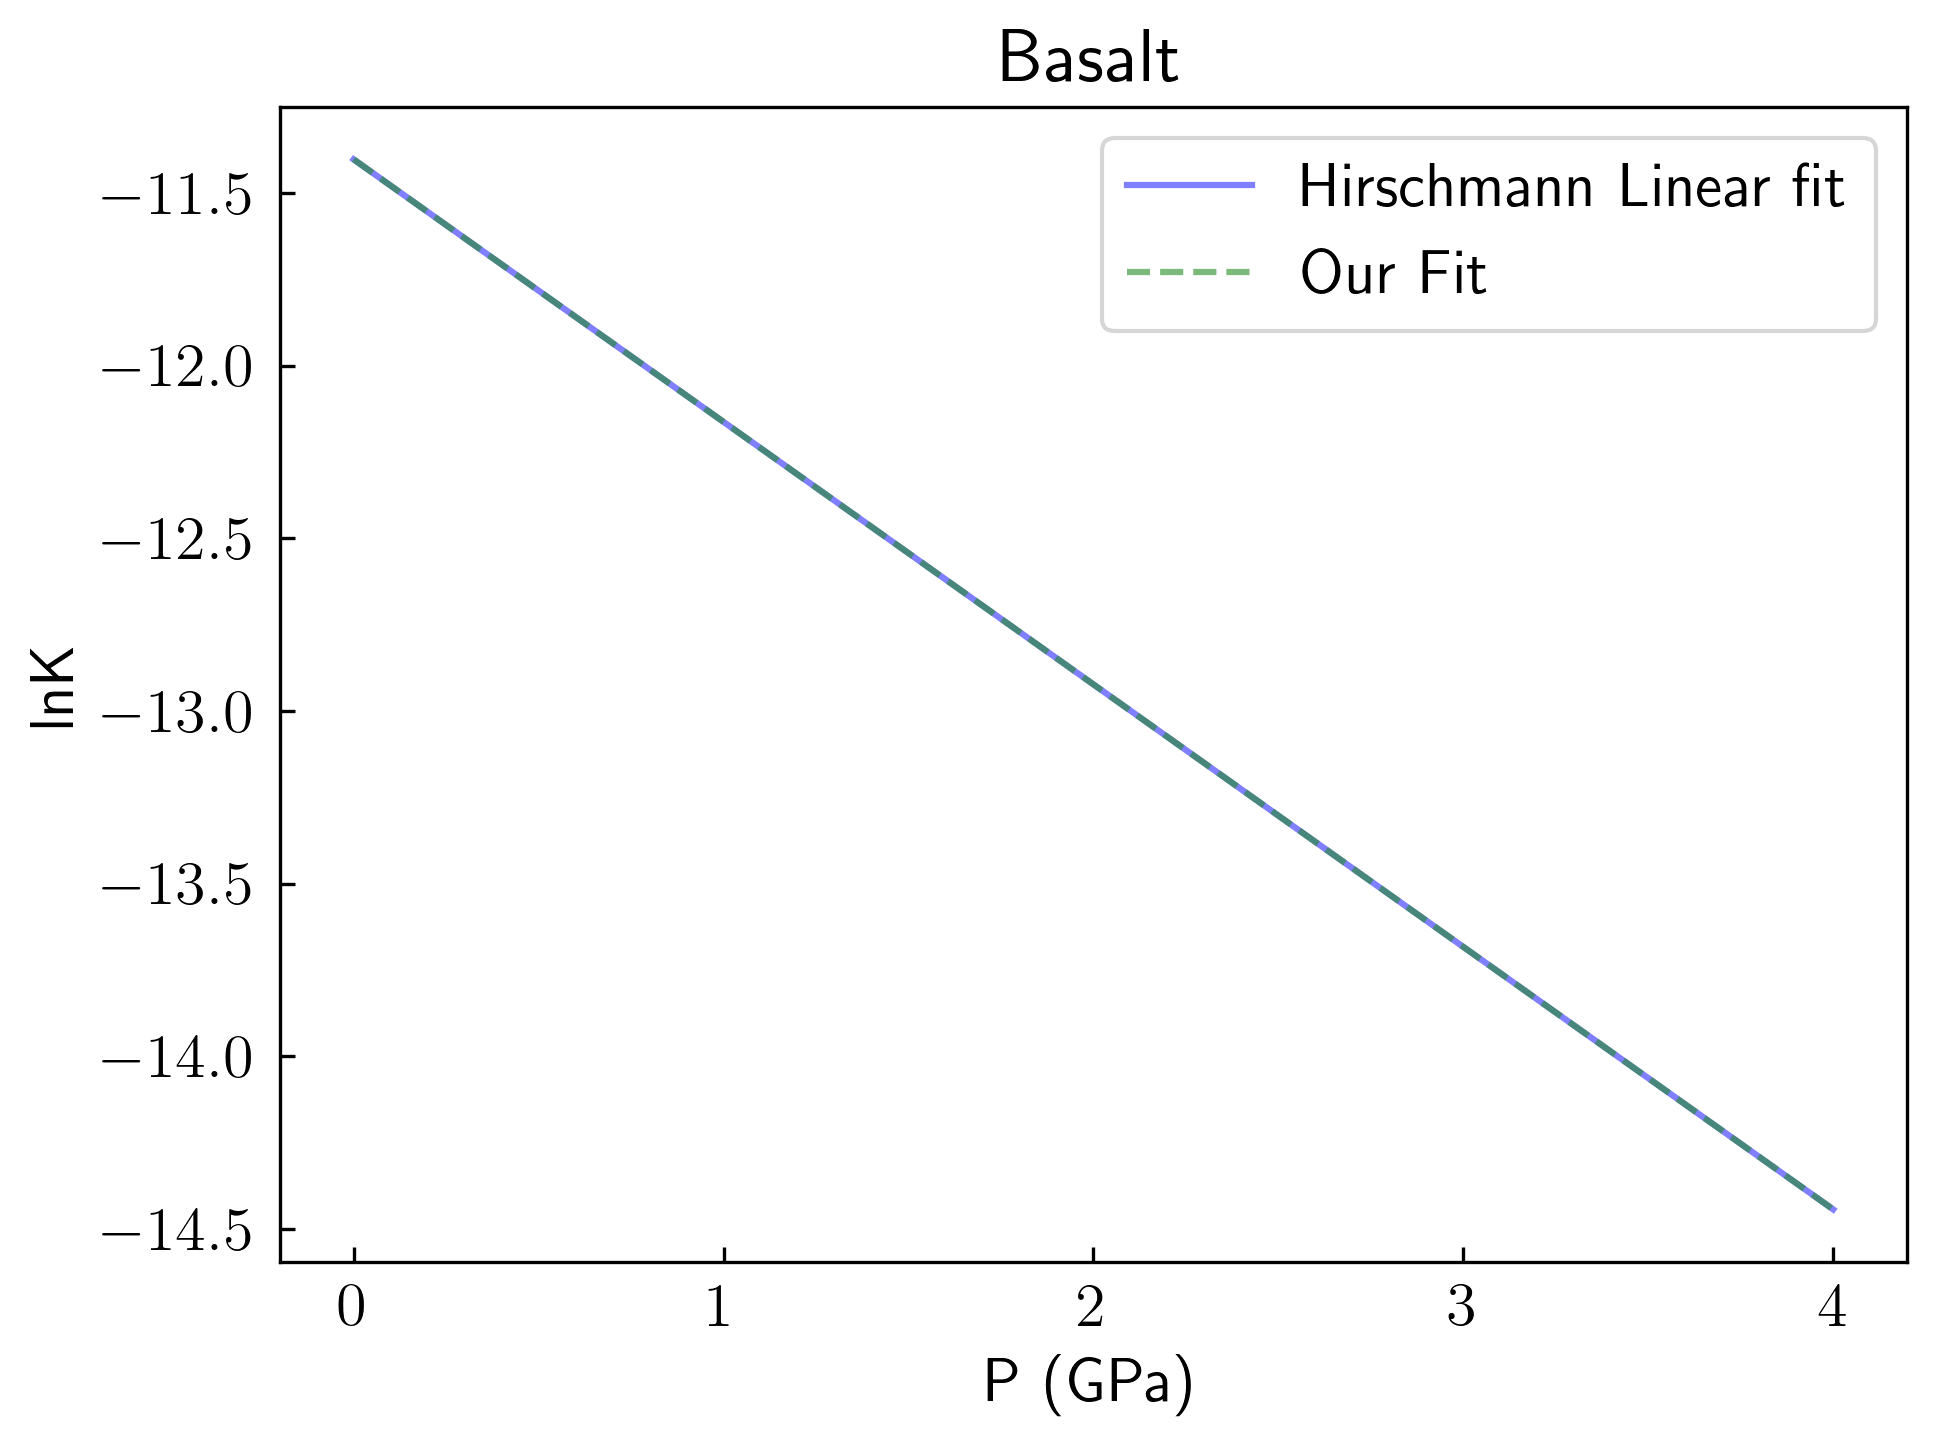

In [100]:
pressure_arr = np.arange(0,4.1, 0.1)
GPa_to_bar: float = 1e4 #bar/GPa
fig, ax = plt.subplots()
plt.plot(pressure_arr, -11.403 - (0.76*pressure_arr), color='blue', alpha=0.5, label='Hirschmann Linear fit')
#plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((25766.1717*pressure_arr) - 18763.4756)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((7977.1995*(pressure_arr**2)) - 1667.9626*pressure_arr + 1363.7547)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.legend()
plt.ylabel('lnK')
plt.xlabel('P (GPa)')
plt.title('Basalt')
plt.show()


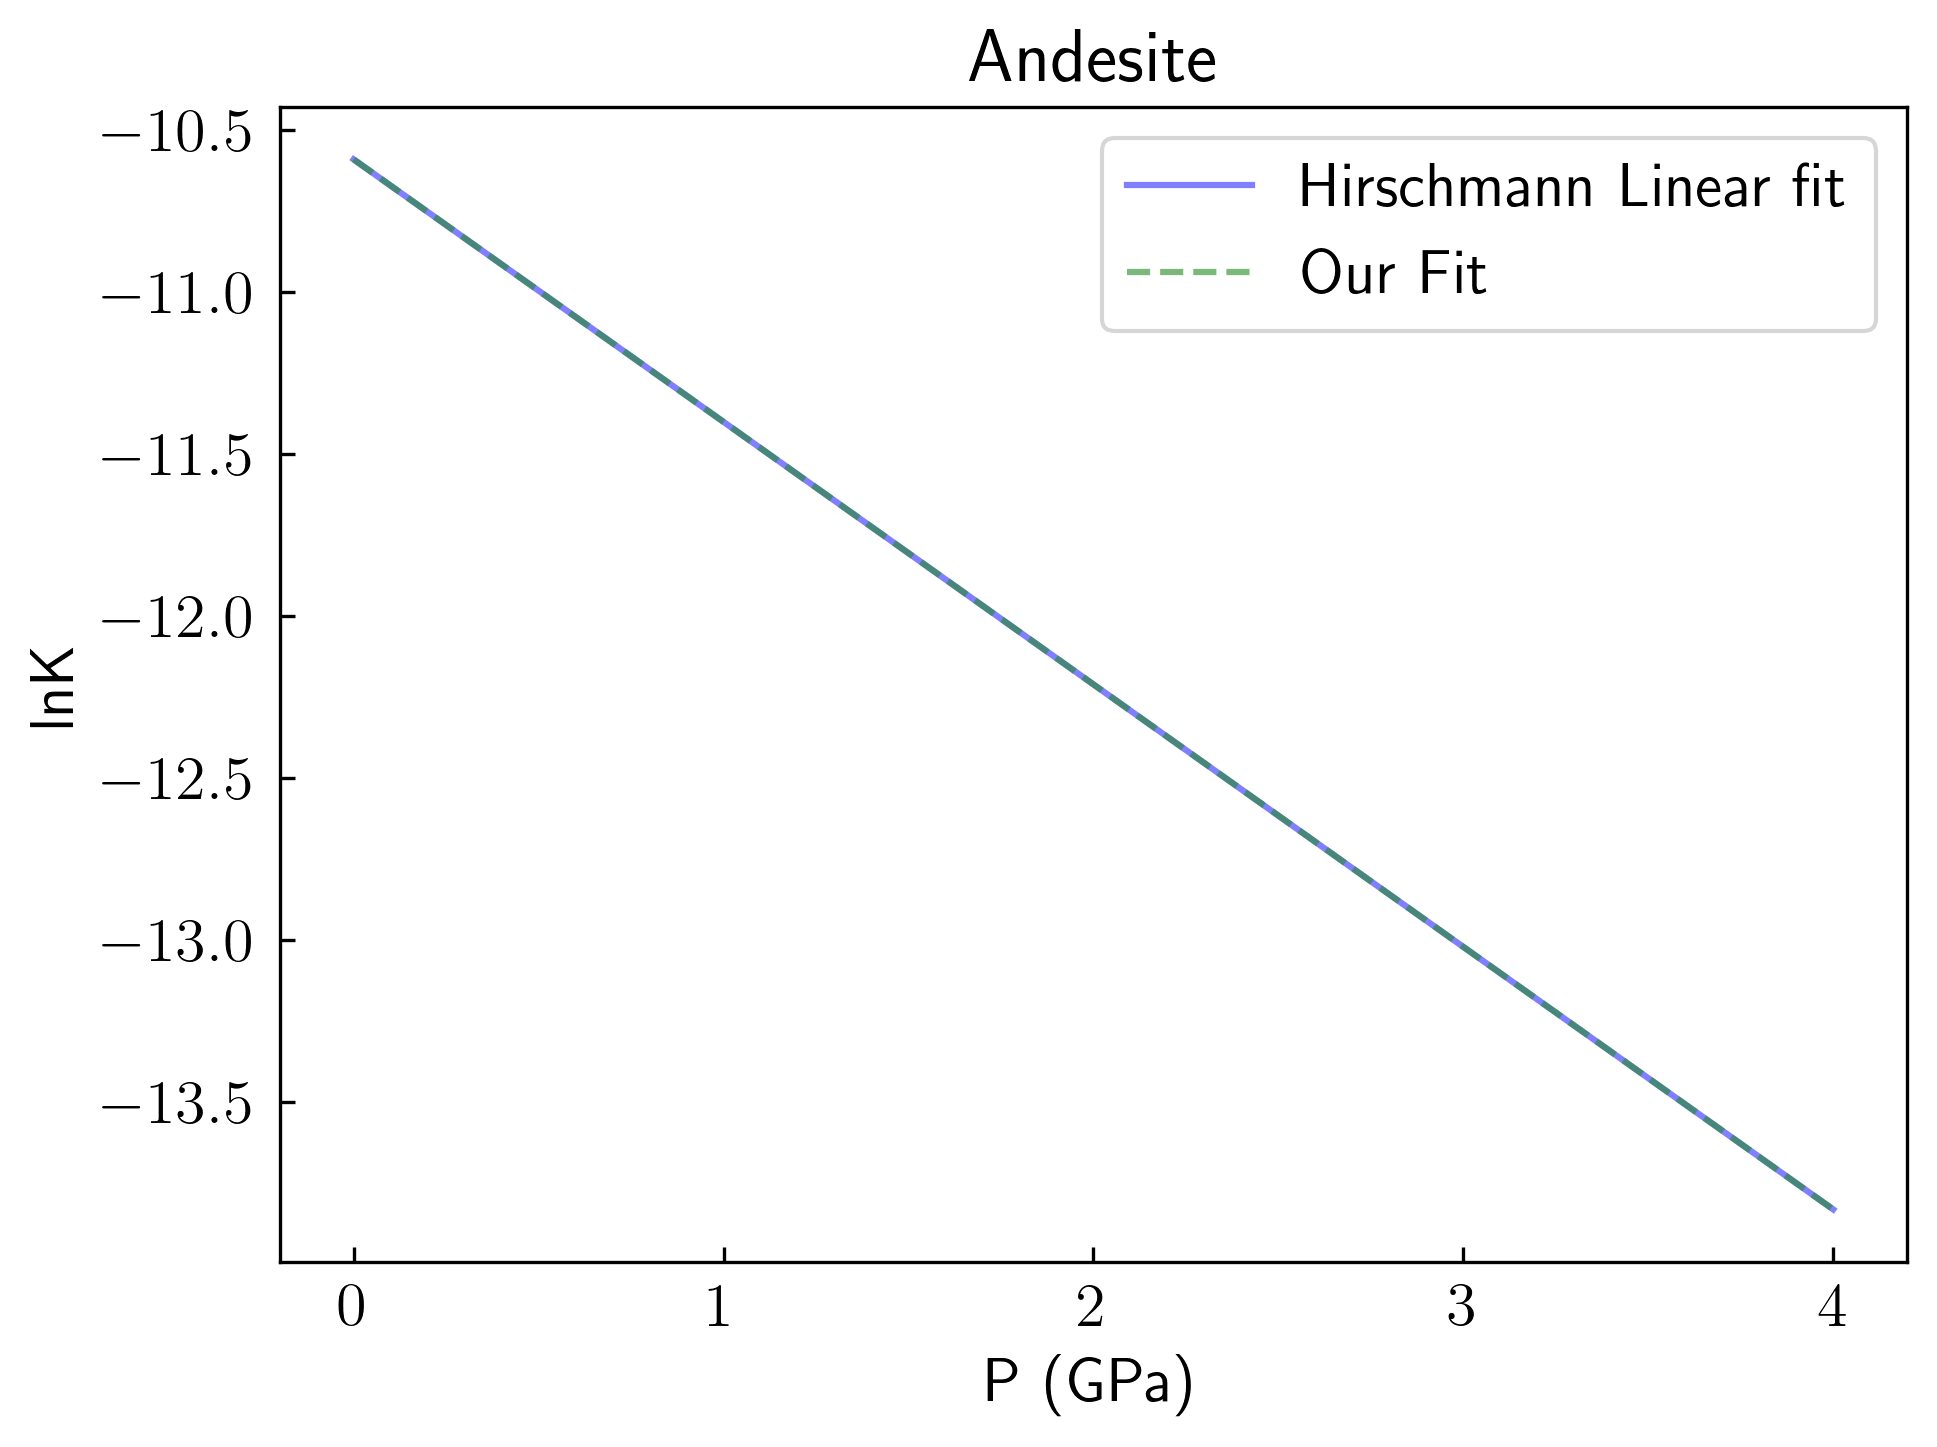

In [105]:
fig, ax = plt.subplots()
plt.plot(pressure_arr, -10.591 - (0.81*pressure_arr), color='blue', alpha=0.5, label='Hirschmann Linear fit')
#plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((25766.1717*pressure_arr) - 18763.4756)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.plot(pressure_arr, np.log((H2_HirschmannFig4_Andesite(pressure_arr*GPa_to_bar)/1e6)/((11356.1024*(pressure_arr**2)) - 6604.1468*pressure_arr + 2897.5700)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.legend()
plt.ylabel('lnK')
plt.xlabel('P (GPa)')
plt.title('Andesite')
plt.show()

### Gaillard et al. 2003

In [293]:
#Fitting a power law (y = a*x^b) to the fH2 vs. SH2 (ppmw) data from Table 4
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a* (x**b)

def fit_powerlaw(composition:str, Col1:str, Col2: str, Col3:str, colyouwanttofit:str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=(Col1, Col2, Col3))
    # Least squares fitting.
    pressure: np.ndarray = df[Col1].to_numpy()
    H2ppmw_arr: np.ndarray = df[Col2].to_numpy()
    H2gm3_arr: np.ndarry = df[Col3].to_numpy()
    if colyouwanttofit == 'ppmw':
        solution, _ = curve_fit(power_law, pressure, H2ppmw_arr)
    else:
        solution, _ = curve_fit(power_law, pressure, H2gm3_arr)

    return solution
    

In [294]:
a_G, b_G = fit_powerlaw('Gaillard2003', 'pressure_bar', 'H2_ppmw', 'H2_gm3', 'ppmw')
a_G2, b_G2 = fit_powerlaw('Gaillard2003', 'pressure_bar', 'H2_ppmw', 'H2_gm3', 'gm3')
print(a_G, b_G)
print(a_G2, b_G2)

0.1632791725915049 1.2520789735985258
0.3398394189199441 1.276147085479733


# Sulfur Solubility

## SO2 Solubility (Boulliung & Wood 2022)

In [145]:
#Data gathered from Table 3 S(ppm) vs. temperature

def lsq_SO2vsT(filename:str, typeoffit:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares or polynomial fit coefficients.
    """
    datafile: str = f"data/solubility_data/SO2/{filename}"
    df:pd.DataFrame = pd.read_csv(datafile, names=('T_K', 'S_ppm'))
    Temp: np.ndarray = df['T_K'].to_numpy()
    S_arr: np.ndarray = df['S_ppm'].to_numpy()
    if typeoffit == 'linear':
        # Least squares fitting.
        design_matrix: np.ndarray = Temp[:, np.newaxis]**[1, 0]
        #print('design matrix:', design_matrix)
        solution, _, _, _ = np.linalg.lstsq(design_matrix, S_arr, rcond=None)
    elif typeoffit == 'poly':
        solution = np.polyfit(Temp, S_arr, deg=2)
    return solution


 

In [151]:
a_NIB, b_NIB, c_NIB = lsq_SO2vsT('NIB_SvsT.csv', 'poly')

a_lb, b_lb, c_lb = lsq_SO2vsT('LunarBasalt_SvsT.csv', 'poly')

a_and, b_and = lsq_SO2vsT('Andesite_SvsT.csv', 'linear')

print('Andesite Fit:', a_and, b_and)

Andesite Fit: -0.29028571428571454 528.3908571428574


    T_K  S_ppm
0  1523    500
1  1573    220
2  1623     64
3  1673     87
4  1723     52
5  1773     25


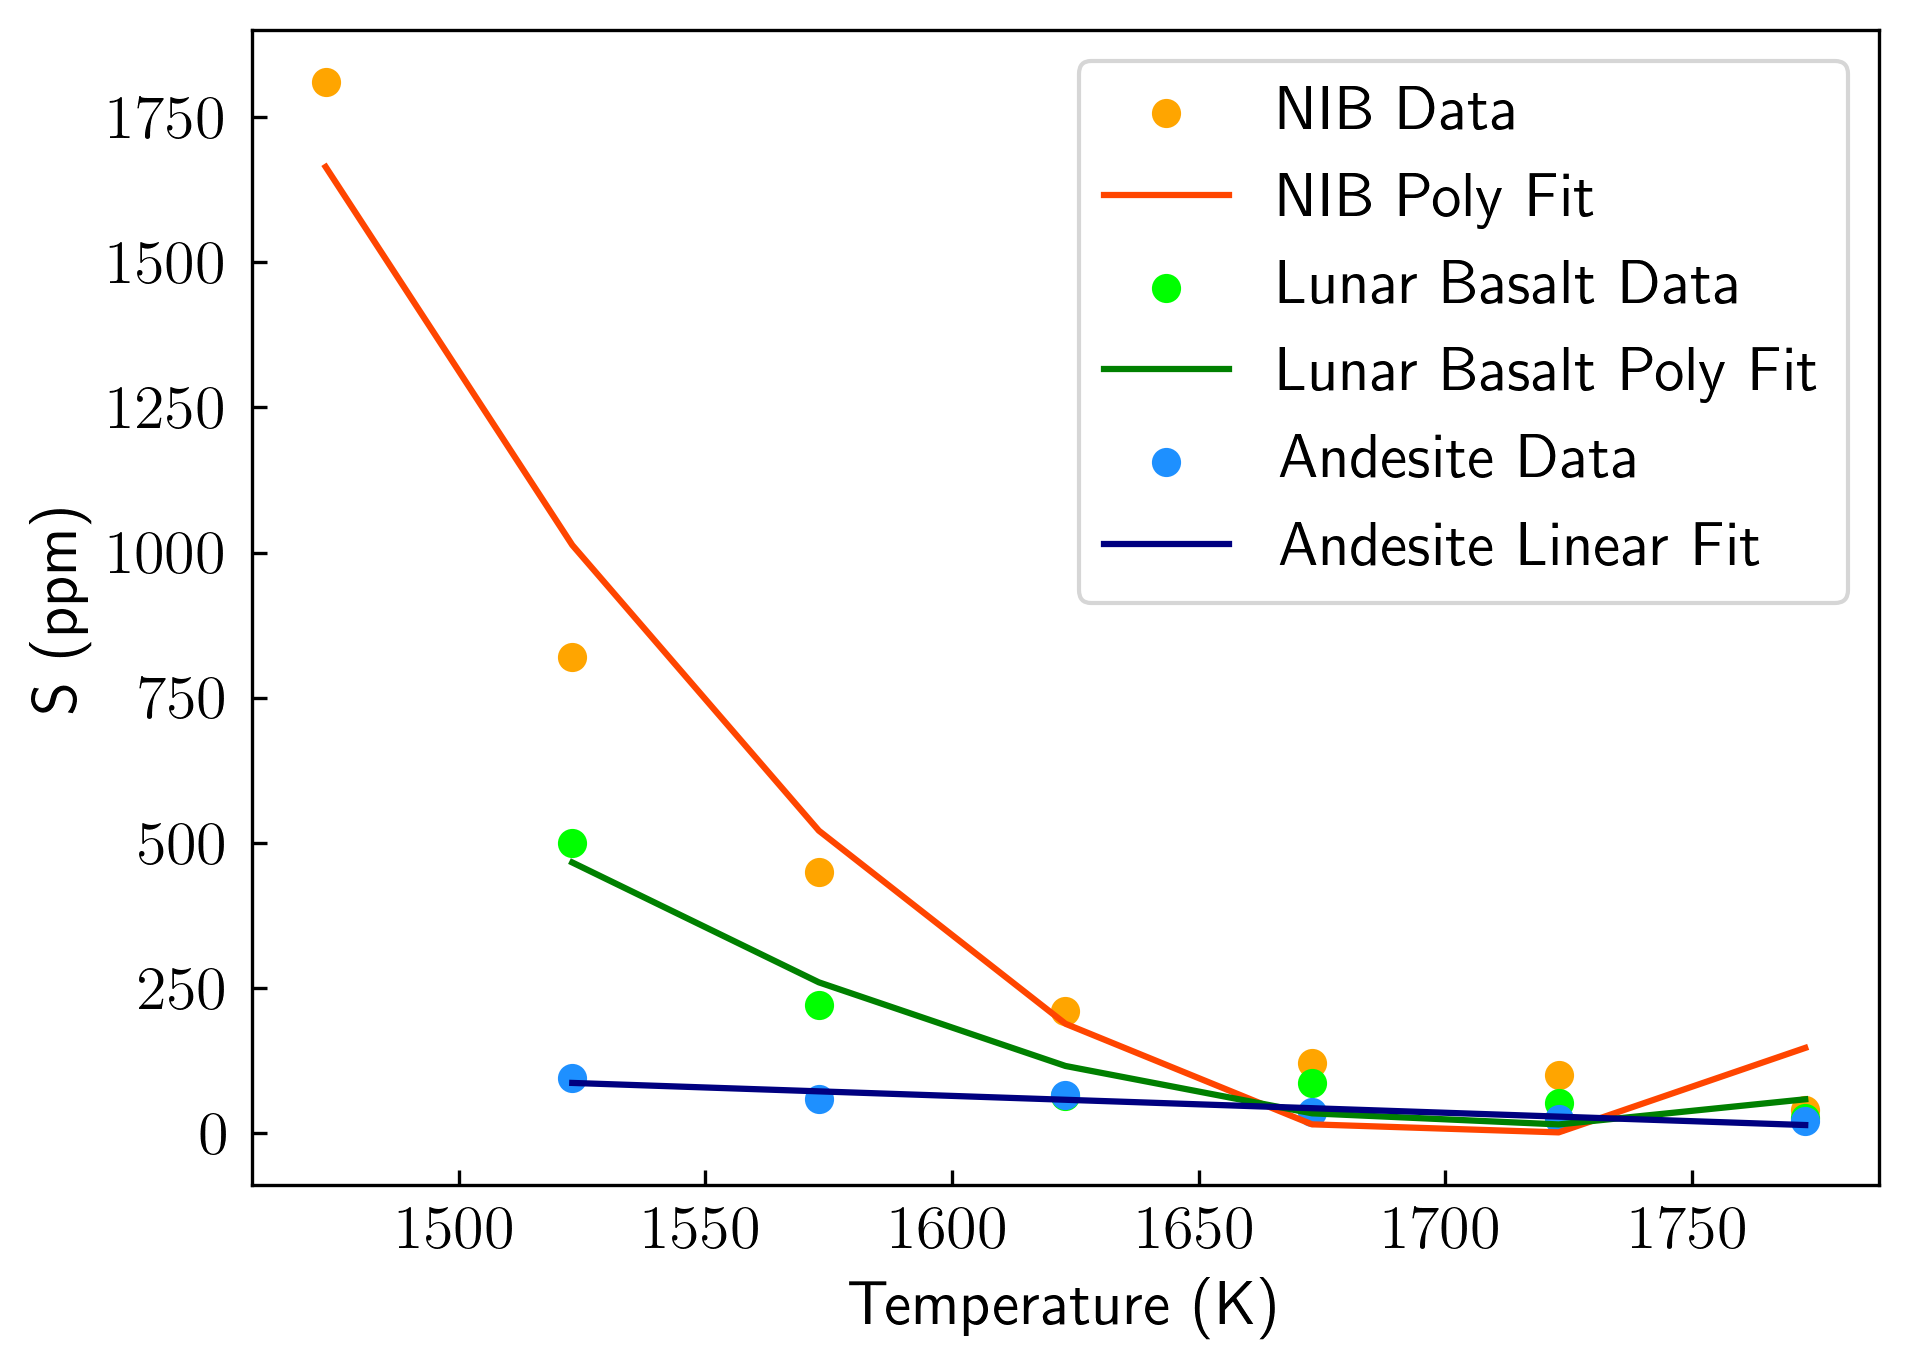

In [150]:
NIB_SvsT: str = f"data/solubility_data/SO2/NIB_SvsT.csv"
NIB_df:pd.DataFrame = pd.read_csv(NIB_SvsT, names=('T_K', 'S_ppm'))

LB_SvsT: str = f"data/solubility_data/SO2/LunarBasalt_SvsT.csv"
LB_df:pd.DataFrame = pd.read_csv(LB_SvsT, names=('T_K', 'S_ppm'))
print(LB_df)

And_SvsT: str = f"data/solubility_data/SO2/Andesite_SvsT.csv"
And_df:pd.DataFrame = pd.read_csv(And_SvsT, names=('T_K', 'S_ppm'))


fig, ax = plt.subplots()
plt.scatter(NIB_df.T_K, NIB_df.S_ppm, color='orange', label='NIB Data')
plt.plot(NIB_df.T_K, ((NIB_df.T_K**2)*a_NIB) + (b_NIB*NIB_df.T_K) + c_NIB, color='orangered', label='NIB Poly Fit')

plt.scatter(LB_df.T_K, LB_df.S_ppm, color='lime', label='Lunar Basalt Data')
plt.plot(LB_df.T_K, ((LB_df.T_K**2)*a_lb) + (b_lb*LB_df.T_K) + c_lb, color='green', label='Lunar Basalt Poly Fit')

plt.scatter(And_df.T_K, And_df.S_ppm, color='dodgerblue', label='Andesite Data')
plt.plot(And_df.T_K, (And_df.T_K*a_and) + b_and, color='navy', label='Andesite Linear Fit')

plt.xlabel('Temperature (K)')
plt.ylabel('S (ppm)')
plt.legend()
plt.show()

# Testing Solubility Laws

## H2 (Hirschmann et al. 2012 and Gaillard et al. 2003)

In [304]:
#Basalt (Hirschmann et al. 2012), Comparing with Table 2

def Basalt_H2solubility(fugacity):
        ppmw: float = power_law(fugacity, 53.65376426, 0.38365457)
        return ppmw

print(Basalt_H2solubility(36491), 'pppmw')
print(Basalt_H2solubility(36491)/1e4, 'wt.%')

3019.281560486162 pppmw
0.3019281560486162 wt.%


In [309]:
#Andesite (Hirschmann et al. 2012), Comparing with Table 2
def Andesite_H2solubility(fugacity):
    ppmw: float = power_law(fugacity, 34.43369241, 0.49459427)  
    return ppmw

print(Andesite_H2solubility(67129), 'ppmw')
print(Andesite_H2solubility(67129)/1e4, 'wt.%')


8401.28487741923 ppmw
0.840128487741923 wt.%


In [312]:
#Gaillard et al. 2003

def Silicic_H2solubility(fugacity):
    ppmw: float = power_law(fugacity, 0.163, 1.252)
    return ppmw

print(Silicic_H2solubility(70), 'ppmw')


33.28513712841647 ppmw
